# Module 1. Classic ML with Cats

## Description of the competition
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## File and Data Field Descriptions
### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
### sample_submission.csv - A submission file in the correct format.
- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

(Описание к коду написано под элементами с кодом)

In [28]:
import numpy as np
import pandas as pd
from clearml import Task

import os
for dirname, _, filenames in os.walk("..\\data\\inputs"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\data\inputs\test.csv
..\data\inputs\train.csv


Смотрим какие файлы есть в папке

In [29]:
task = Task.init(
    project_name="Spaceship Titanic",
    task_name="Data analysis",
    tags=["classification"]
)

ClearML Task: overwriting (reusing) task id=484dd8564e84459d91fd1651d5a28114
2025-03-23 03:21:29,666 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/120493f4128d4328ba74e1d289dbea32/experiments/484dd8564e84459d91fd1651d5a28114/output/log


Подключаем clearML

In [30]:
train_data = pd.read_csv("..\\data\\inputs\\train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Оцениваем тренировочные данные визуально. Смотрим какие есть колонки, как пишутся данные, типы данных.

In [31]:
test_data = pd.read_csv("..\\data\\inputs\\test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Аналогично оцениваем тестовые данные

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Смотрим какой тип данных у колонок, сколько не пустых ячеек. Видим что количество непустых ячеек отличается => есть пропуски данных

In [33]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

3441

Выводим точное количество пустых ячеек. Оно достаточно большое. Для корректного обучения и тестирования нужно будет заполнить пробелы значениями по умолчанию либо усредненными значениями

In [34]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]
test_numeric_data = [column for column in test_data.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_data.select_dtypes(exclude=["int", "float"])]
test_categoric_data = [column for column in test_data.select_dtypes(exclude=["int", "float"])]

train_data["CryoSleep"] = train_data["CryoSleep"].astype(bool).fillna(False)
train_data["VIP"] = train_data["VIP"].astype(bool).fillna(False)

test_data["CryoSleep"] = test_data["CryoSleep"].astype(bool).fillna(False)
test_data["VIP"] = test_data["VIP"].astype(bool).fillna(False)

for col in numeric_data:
    train_data[col] = train_data[col].infer_objects(copy=False).fillna(train_data[col].median())
for col in test_numeric_data:
    test_data[col] = test_data[col].infer_objects(copy=False).fillna(test_data[col].median())

for col in categoric_data:
    train_data[col] = train_data[col].fillna(train_data[col].value_counts().index[0]).infer_objects(copy=False)
for col in test_categoric_data:
    test_data[col] = test_data[col].fillna(test_data[col].value_counts().index[0]).infer_objects(copy=False)

Заполняем пробелы в данных

In [35]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

0

Проверяем что больше нет пустых ячеек

In [36]:
print("Columns in object data type: \n",
      list(train_data.select_dtypes("object").columns))

Columns in object data type: 
 ['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']


Смотрим какие колонки имеют тип object

In [37]:
print("Columns in numeric data type: \n",
      list(train_data.select_dtypes(["int", "float"]).columns))

Columns in numeric data type: 
 ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


Смотрим какие есть колонки с числовыми данными

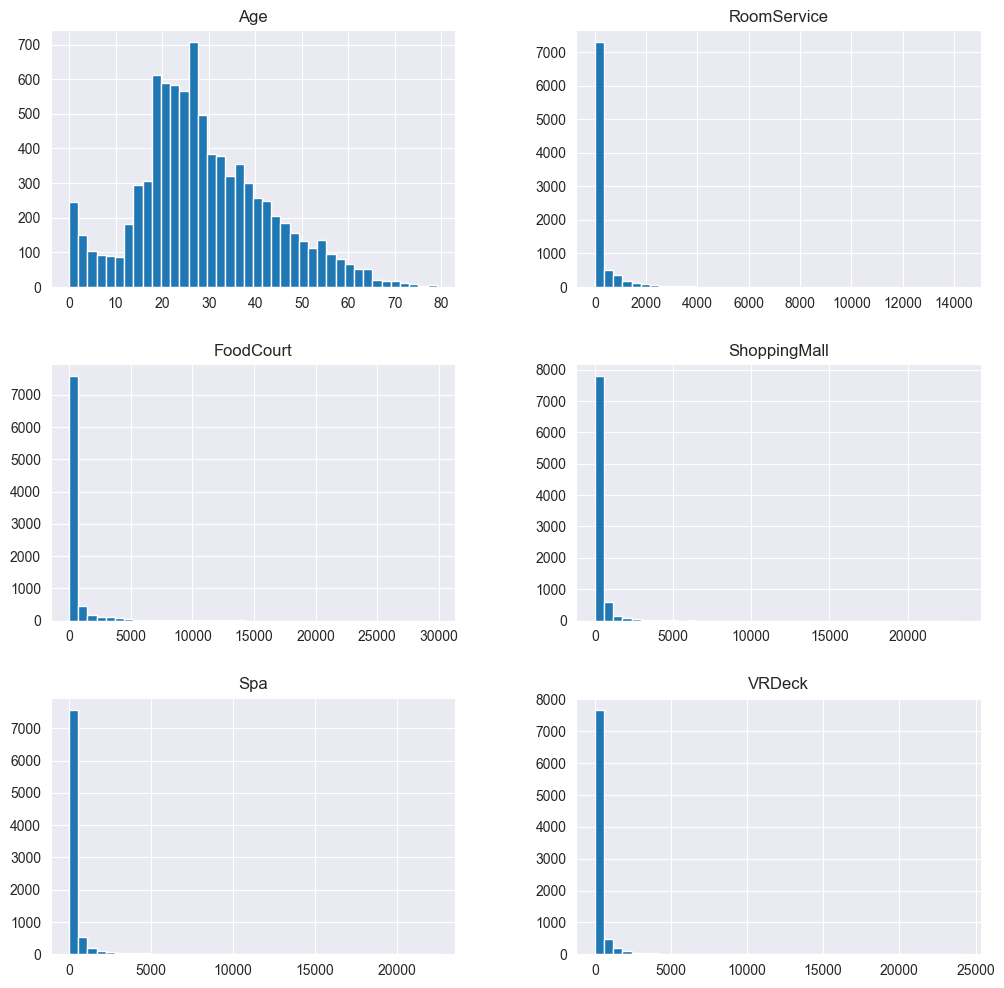

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
train_data.hist(bins = 40, figsize = (12, 12))
plt.show()

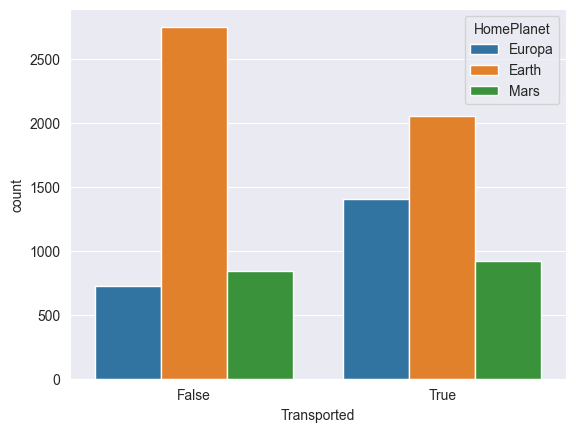

In [39]:
sns.countplot(data=train_data, x='Transported',
             hue='HomePlanet')
plt.show()

Проанализируем некоторые данные по отдельности. Начнем с родительской планеты. Из графика видим, что больше всего пассажиров было с Земли. Большинство пассажиров с Земли не долетели, а с Марса и Европы - долетели.

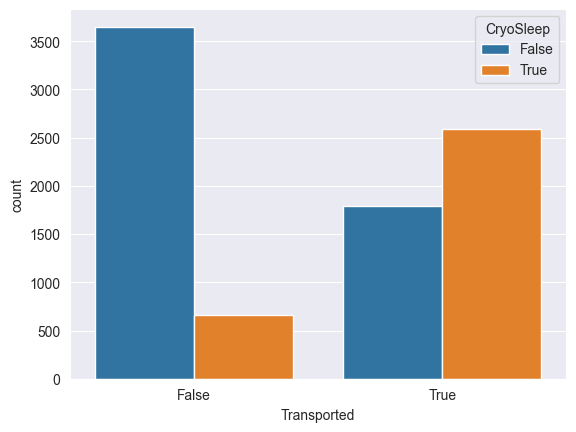

In [40]:
sns.countplot(data=train_data,
             x='Transported',
             hue='CryoSleep')
plt.show()


График по зависимости влияния Cryosleep на Transported. Видим, что большинство не спавших людей НЕ были транспортированы, а спавших - были.

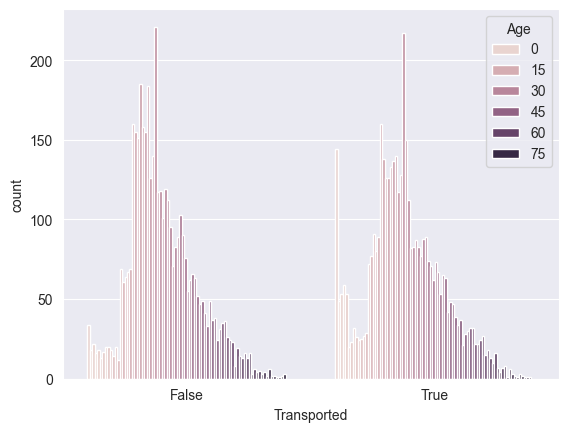

In [41]:
sns.countplot(data=train_data,
             x='Transported',
             hue='Age')
plt.show()

От возраста не видно прямой зависимости на транспортировку.

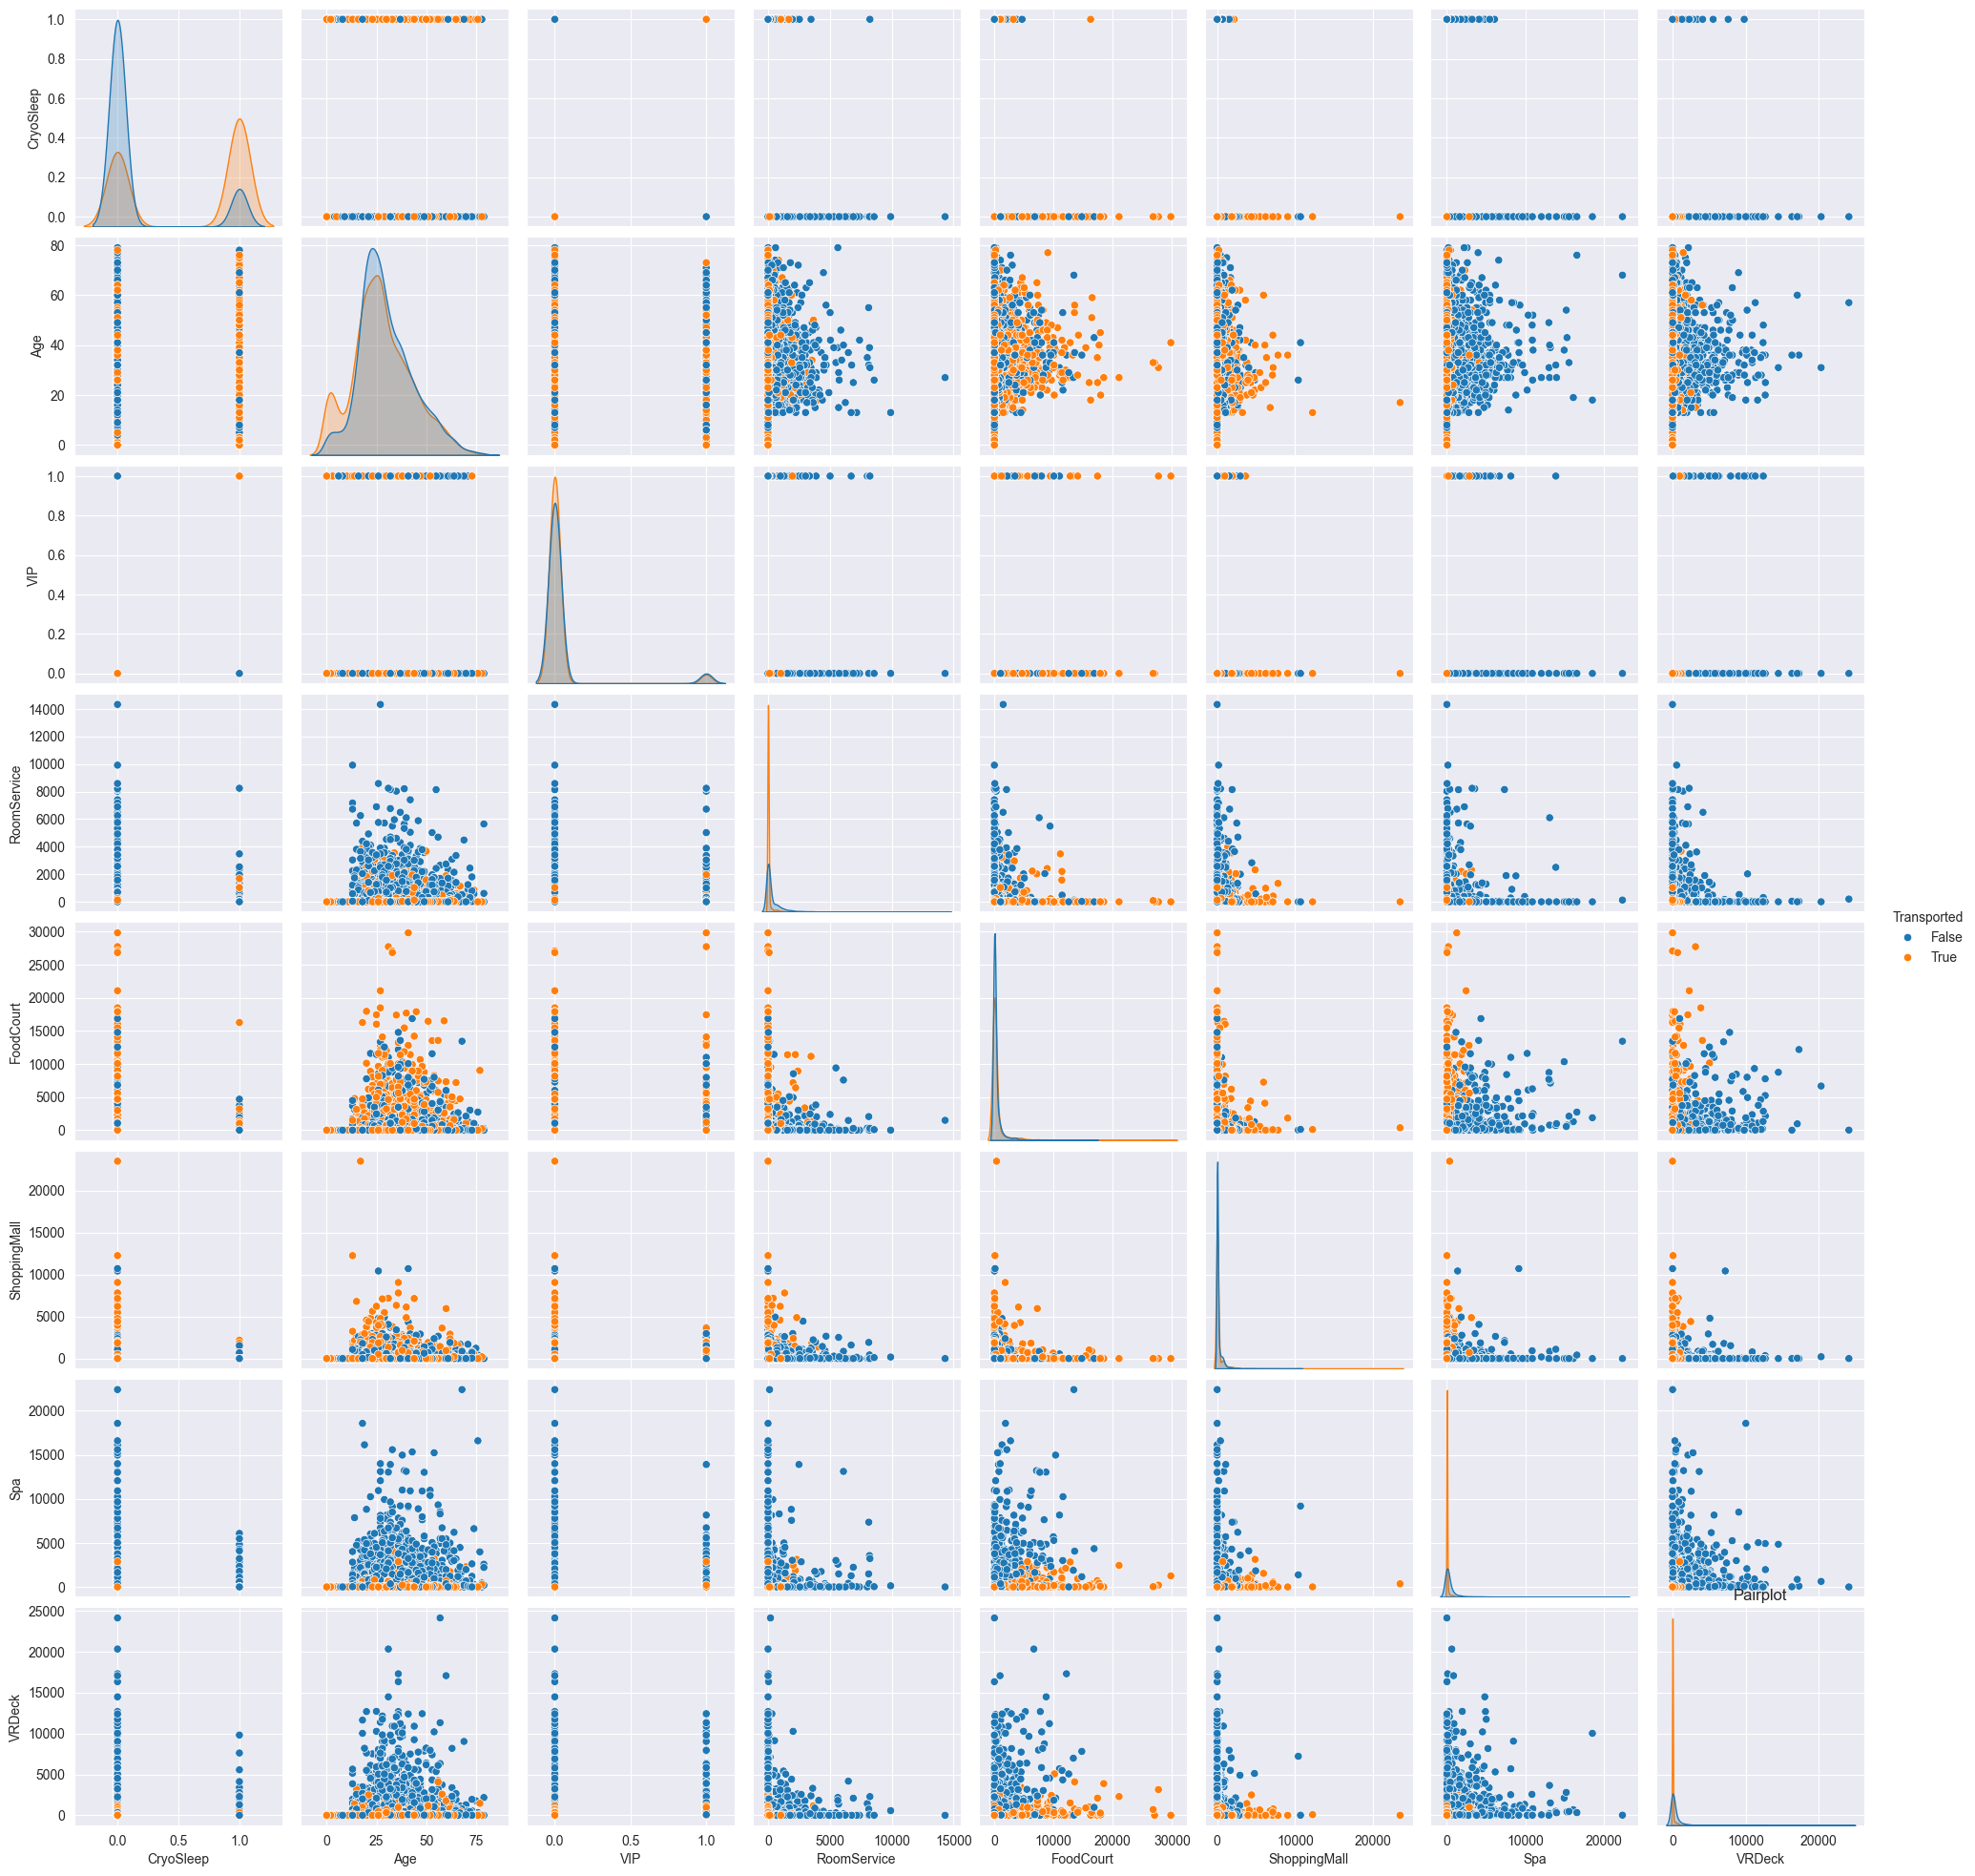

In [42]:
sns.pairplot(train_data, hue='Transported')
plt.title('Pairplot')
plt.show()

Выведем всевозможные графики с различными зависимостями колонок друг от друга и данными и том, кто был транспортирован, а кто нет.

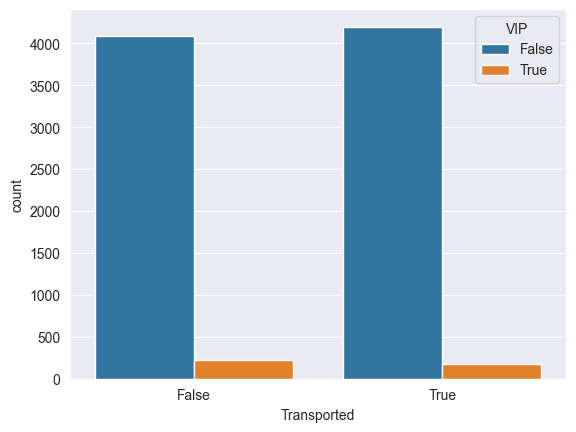

In [43]:
sns.countplot(data=train_data,
             x='Transported',
             hue='VIP')
plt.show()

Из прошлого граффика я заметила, что количество людей с VIP и без сильно отличается. Смотрим влияние VIP на транспортировку: наличие VIP незначительно влияет.

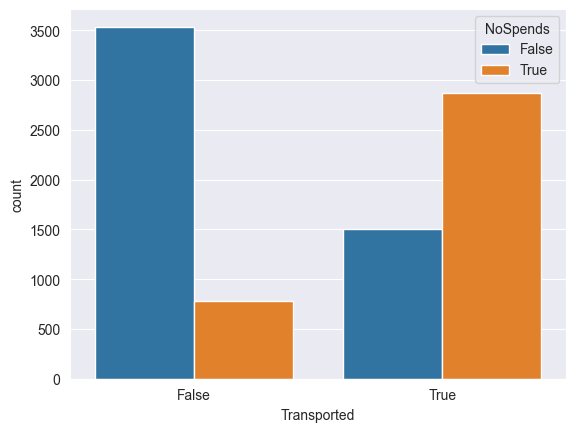

In [44]:
spends_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data["Spends"] = train_data[spends_columns].sum(axis=1)
train_data["NoSpends"] = (train_data["Spends"] == 0)
sns.countplot(data=train_data,
             x='Transported',
             hue='NoSpends')

plt.show()

Расходы по отдельности сложно анализировать, поэтому упростим данные о расходах. Получается, те кто не тратили деньги чаще были транспортированы.

In [45]:
train_data[['deck', 'num', 'side']] = train_data['Cabin'].str.split('/', expand = True)
train_data['deck'].value_counts()

deck
F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Для анализа данных о кабине разделим колонку Cabin на три других. Посмотрим количество пассажиров в разных deck - пассажиры распределены не равномерно

C:\Users\IIsovaII\PycharmProjects\PythonProject\.venv\Lib\site-packages\clearml\utilities\plotlympl\renderer.py:210: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



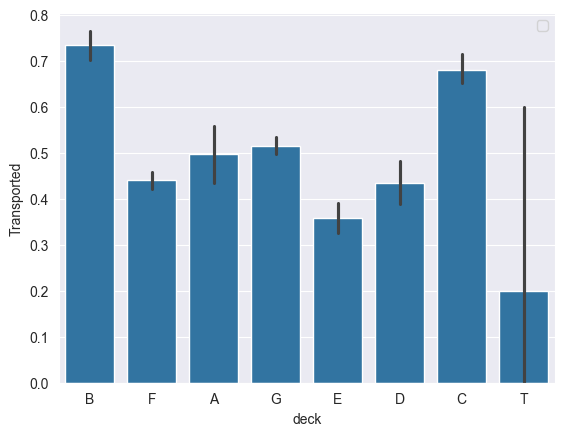

In [46]:
sns.barplot(x = 'deck', y = 'Transported', data = train_data)
plt.show()

График показывает что вероятность быть транспортированным у пассажиров из deckB больше всего.

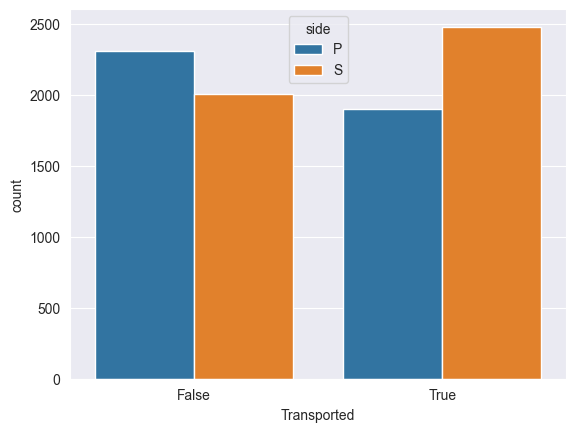

In [47]:
sns.countplot(data=train_data,
             x='Transported',
             hue='side')
plt.show()

Распределение по сторонам примерно одинаковое, но у пассажиров с side S вероятность быть транспортированным выше.

In [48]:
task.close()

Исходя из анализа данных в файле `choosing_best_algo.ipynb` данные будут подготовлены и протестируется, какой алгоритм будет давать лучшую результативность. Я считаю, для оптимального обучения данных понадобится заполнить недостающие ячейки, разделить колонку Cabin на несколько отдельных колонок, информацию о тратах упростить или добавить отдельный столбец о сумме трат или об их наличии в целом.